In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

df = pd.read_csv(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\Time series Analysis\LSTM\IMPUT\monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [7]:

df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

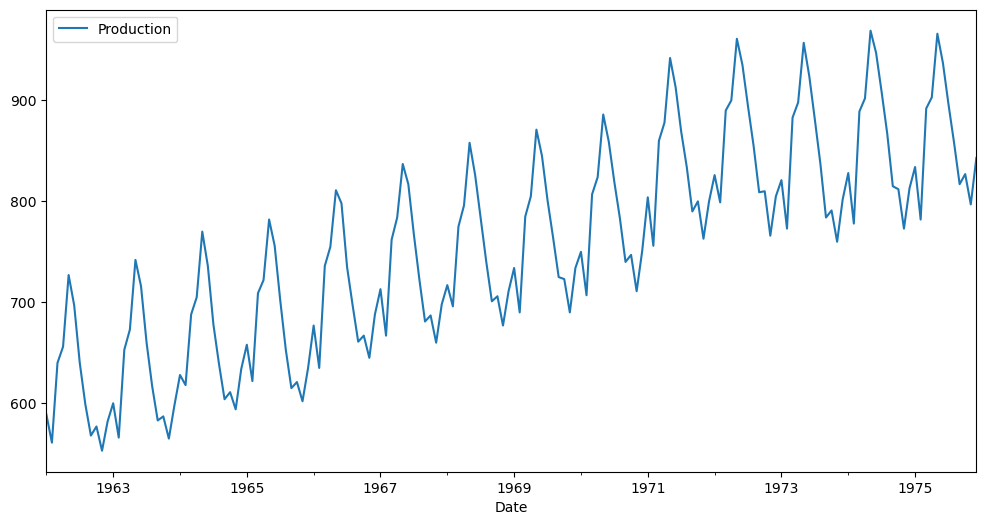

In [9]:
df.plot(figsize=(12,6))

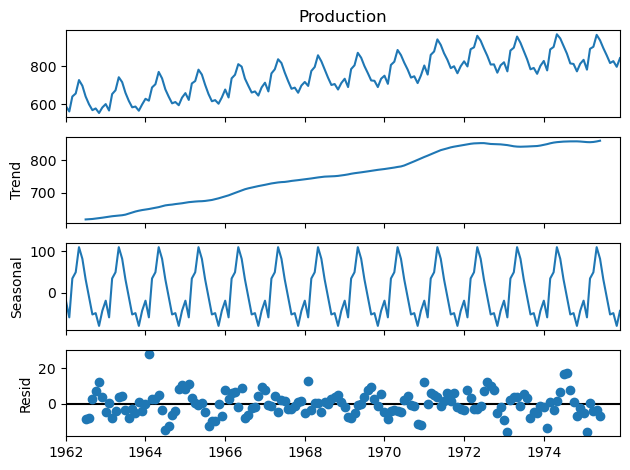

In [11]:

from statsmodels.tsa.seasonal import seasonal_decompose


results = seasonal_decompose(df['Production'])
results.plot();
     

In [15]:
# Monthly data the 14 ans
len(df)

168

In [17]:

train = df.iloc[:156]
test = df.iloc[156:]

In [19]:
train.tail(), test.head()

(            Production
 Date                  
 1974-08-01         867
 1974-09-01         815
 1974-10-01         812
 1974-11-01         773
 1974-12-01         813,
             Production
 Date                  
 1975-01-01         834
 1975-02-01         782
 1975-03-01         892
 1975-04-01         903
 1975-05-01         966)

In [21]:
test.shape

(12, 1)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:

df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [27]:

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [29]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [61]:
scaled_test[:10]

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385]])

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [35]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [37]:

X.shape

(1, 3, 1)

In [39]:

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [41]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [43]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:

# fit model
model.fit(generator,epochs=50)

Epoch 1/50


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0775
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053


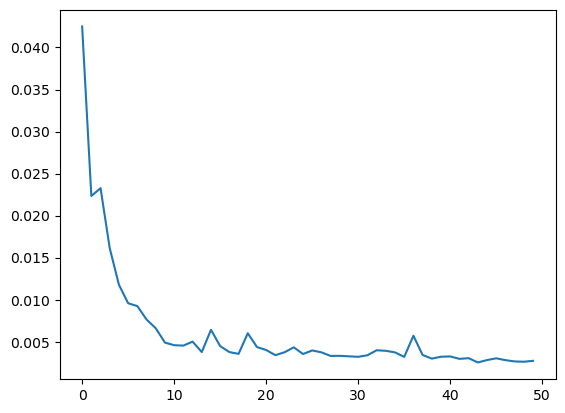

In [49]:

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [51]:

last_train_batch = scaled_train[-12:]

In [53]:

last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [55]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[0.6009473]], dtype=float32)

In [57]:

scaled_test[0]

array([0.67548077])

Ici on prend les 12 derniere valeur du train pour essayer de predire la premiere valeur du test et voir si ca correspond 

In [64]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C’est la ligne la plus importante ! Elle met à jour le batch d’entrée pour la prochaine itération :

current_batch[:,1:,:] : on retire la première observation de la séquence.

[[current_pred]] : on ajoute la nouvelle prédiction à la fin de la séquence (il faut que la forme soit compatible).

np.append(..., axis=1) : on ajoute le nouveau point le long de l’axe temporel (axe 1).

👉 Cela permet de faire des prédictions pas à pas, en utilisant les prédictions précédentes comme nouvelles entrées


In [70]:

test_predictions

[array([0.6009473], dtype=float32),
 array([0.60509545], dtype=float32),
 array([0.774084], dtype=float32),
 array([0.8710346], dtype=float32),
 array([0.9794344], dtype=float32),
 array([0.95807743], dtype=float32),
 array([0.87833726], dtype=float32),
 array([0.76591676], dtype=float32),
 array([0.65751517], dtype=float32),
 array([0.6006796], dtype=float32),
 array([0.5582543], dtype=float32),
 array([0.57982576], dtype=float32)]

In [72]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [74]:

true_predictions = scaler.inverse_transform(test_predictions)

In [76]:

test['Predictions'] = true_predictions

C:\Users\rtekem\AppData\Local\Temp\ipykernel_7432\1950671339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

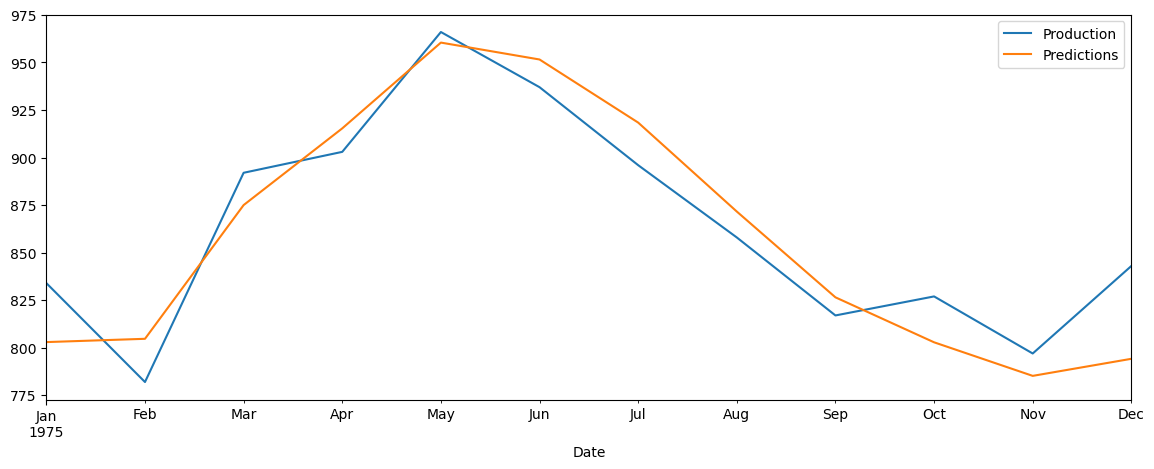

In [78]:

test.plot(figsize=(14,5))

In [80]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

22.43439451547715


In [82]:
from sklearn.metrics import mean_absolute_error

# Calcul du MAE
mae = mean_absolute_error(test['Production'], test['Predictions'])

# Calcul du MAE en pourcentage
mae_percent = (mae / test['Production'].mean()) * 100

print(f"MAE : {mae}")
print(f"MAE % : {mae_percent:.2f}%")

MAE : 19.44871505101524
MAE % : 2.25%


#TEST

In [175]:
df = pd.read_excel(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT\Sales forecasting by product line and region\DF_FP1.xlsx')

df.head()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Period,Material Grp 3,REGION,Billings EURO,Blg Total Qty,BACKLOG EUR
0,201801,FP1,AMERICA,152493.06,76642,109189.972904
1,201801,FP1,ASIA,56045.16,49720,45988.393700
2,201801,FP1,EUROPE,910539.31,568146,633282.804000
3,201802,FP1,AMERICA,188422.42,158350,179506.883605
4,201802,FP1,ASIA,64500.02,46825,63059.419220


In [177]:
df['Period'] = pd.to_datetime(df['Period'].astype(str), format='%Y%m')

In [179]:
df=df.drop(['REGION','Material Grp 3'],axis=1)

In [181]:
df.head()

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR
0,2018-01-01,152493.06,76642,109189.972904
1,2018-01-01,56045.16,49720,45988.393700
2,2018-01-01,910539.31,568146,633282.804000
3,2018-02-01,188422.42,158350,179506.883605
4,2018-02-01,64500.02,46825,63059.419220


In [183]:
df=df.set_index('Period')


In [185]:
df = df.resample('ME').sum()

In [187]:
df.head()

,Billings EURO,Blg Total Qty,BACKLOG EUR
Period,,,
2018-01-31,1119077.53,694508,7.884612e+05
2018-02-28,1151845.30,885462,1.005021e+06
2018-03-31,1408265.61,979949,1.206280e+06
2018-04-30,1033764.14,874823,1.048132e+06
2018-05-31,994097.51,888078,9.433522e+05


In [189]:

len(df)

96

In [193]:
df = df.iloc[:84,:]

In [209]:
df.head(10)

,Billings EURO,Blg Total Qty,BACKLOG EUR
Period,,,
2018-01-31,1119077.53,694508,7.884612e+05
2018-02-28,1151845.30,885462,1.005021e+06
2018-03-31,1408265.61,979949,1.206280e+06
2018-04-30,1033764.14,874823,1.048132e+06
2018-05-31,994097.51,888078,9.433522e+05
2018-06-30,1532253.22,1116557,1.300481e+06
2018-07-31,1081805.75,1056409,1.203442e+06
2018-08-31,878689.87,656686,8.192441e+05
2018-09-30,1481192.59,1190319,1.512128e+06


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [213]:
data_scaled = scaler.fit_transform(df)

In [215]:
features=data_scaled
target=data_scaled[:,0]

In [217]:
TimeseriesGenerator(features, target, length=3,batch_size=1)[0]

(array([[[0.39246671, 0.4580802 , 0.24433096],
         [0.41458626, 0.64910392, 0.39866719],
         [0.58768019, 0.74362542, 0.54209851]]]),
 array([0.33487677]))

In [219]:
data_scaled

array([[0.39246671, 0.4580802 , 0.24433096],
       [0.41458626, 0.64910392, 0.39866719],
       [0.58768019, 0.74362542, 0.54209851],
       [0.33487677, 0.63846104, 0.42939125],
       [0.30810022, 0.65172088, 0.35471746],
       [0.67137676, 0.8802833 , 0.6092331 ],
       [0.36730677, 0.82011334, 0.54007605],
       [0.23019546, 0.42024439, 0.26626911],
       [0.6369088 , 0.95407224, 0.76006806],
       [0.51673646, 0.60494681, 0.47655156],
       [0.49660715, 0.59114677, 0.51129863],
       [0.40420376, 0.58964822, 0.50858056],
       [0.25228358, 0.43475769, 0.3255998 ],
       [0.36121605, 0.45297734, 0.40481439],
       [0.47877693, 0.58802563, 0.49645331],
       [0.31093389, 0.40513988, 0.39305641],
       [0.37542141, 0.33817944, 0.43738891],
       [0.70487339, 0.62260125, 0.73213598],
       [0.3550399 , 0.36198713, 0.46669436],
       [0.1360529 , 0.37141257, 0.23055612],
       [0.52071182, 0.57893931, 0.5043491 ],
       [0.40610154, 0.31633746, 0.28553308],
       [0.

In [253]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.135, random_state=123, shuffle = False)

In [255]:
x_train.shape

(72, 3)

In [257]:
x_test.shape

(12, 3)

In [263]:
win_length=12
batch_size=1
num_features=3
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, batch_size=batch_size)
#test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, batch_size=batch_size)

In [265]:
train_generator[0]

(array([[[0.39246671, 0.4580802 , 0.24433096],
         [0.41458626, 0.64910392, 0.39866719],
         [0.58768019, 0.74362542, 0.54209851],
         [0.33487677, 0.63846104, 0.42939125],
         [0.30810022, 0.65172088, 0.35471746],
         [0.67137676, 0.8802833 , 0.6092331 ],
         [0.36730677, 0.82011334, 0.54007605],
         [0.23019546, 0.42024439, 0.26626911],
         [0.6369088 , 0.95407224, 0.76006806],
         [0.51673646, 0.60494681, 0.47655156],
         [0.49660715, 0.59114677, 0.51129863],
         [0.40420376, 0.58964822, 0.50858056]]]),
 array([0.25228358]))

In [277]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [279]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [281]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 12, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 12, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,641 (971.25 KB)

 Trainable params: 248,641 (971.25 KB)

 Non-trainable params: 0 (0.00 B)

In [285]:
import tensorflow as tf

# Callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=2,
                                                   mode='min')

# Compilation du modèle
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

# Entraînement du modèle
history = model.fit(train_generator, 
                    epochs=50)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.2305
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.2202
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.1920
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.1802
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.2005
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.2191
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.1511
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.1570
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.1713
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.1380
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

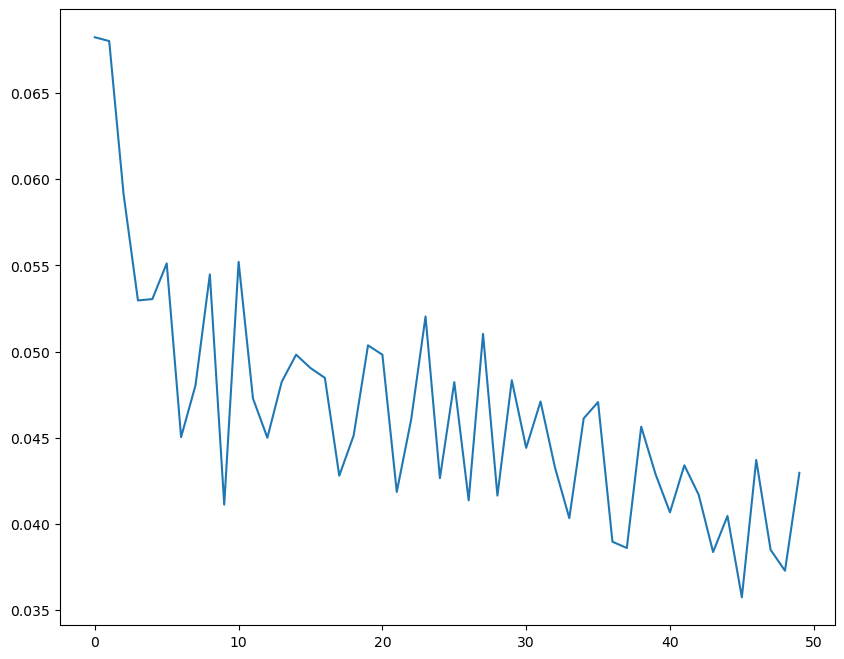

In [287]:

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [311]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

num_features = 3  # exemple, à adapter
win_length = 12   # taille de la séquence

model = Sequential([
    Input(shape=(win_length, num_features)),
    LSTM(100),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [313]:

# fit model
model.fit(train_generator,epochs=50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1331
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0427
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0509
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0417
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0389   
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0424
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0328
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0318
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0312
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261   
Epoch 16/50
6

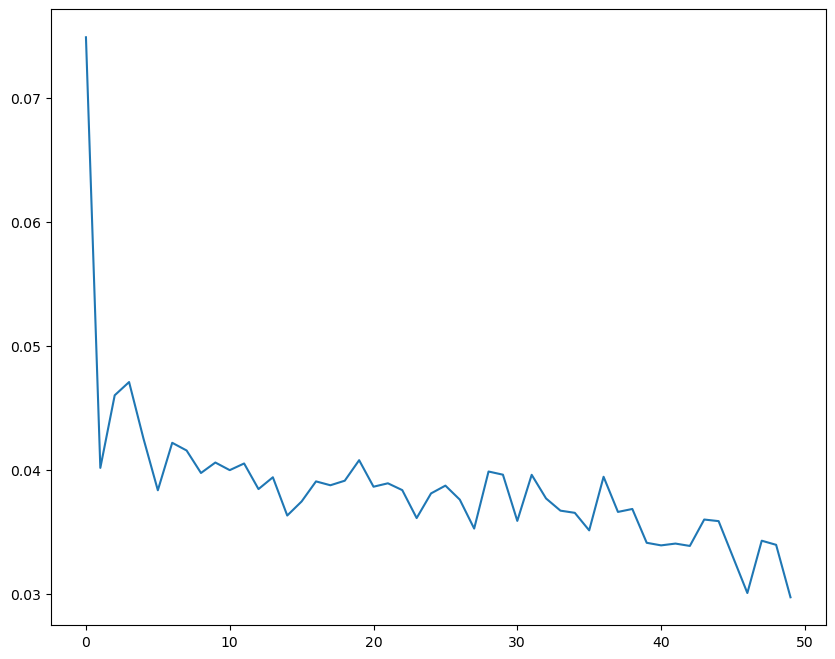

In [315]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [434]:
x_train[-16:]

array([[0.87040863, 0.80898128, 0.97109882],
       [0.73416812, 0.43738865, 0.83657985],
       [0.63918523, 0.06772072, 0.14567893],
       [0.68657676, 0.23007698, 0.44287064],
       [0.48798813, 0.42159788, 0.43674629],
       [0.51390393, 0.36841147, 0.50774768],
       [0.61874345, 0.34594127, 0.65552327],
       [0.46642718, 0.15845884, 0.43375955],
       [0.35495407, 0.25565531, 0.40335092],
       [0.9207696 , 0.37842813, 0.80968983],
       [0.52250228, 0.14502794, 0.3844437 ],
       [0.11099501, 0.14670755, 0.25913153],
       [0.84087702, 0.2556113 , 0.71787712],
       [0.39682362, 0.17974261, 0.42318654],
       [0.42648019, 0.13436204, 0.32557425],
       [0.53986444, 0.30785237, 0.64219902]])

In [436]:
x_train[-16:-4]

array([[0.87040863, 0.80898128, 0.97109882],
       [0.73416812, 0.43738865, 0.83657985],
       [0.63918523, 0.06772072, 0.14567893],
       [0.68657676, 0.23007698, 0.44287064],
       [0.48798813, 0.42159788, 0.43674629],
       [0.51390393, 0.36841147, 0.50774768],
       [0.61874345, 0.34594127, 0.65552327],
       [0.46642718, 0.15845884, 0.43375955],
       [0.35495407, 0.25565531, 0.40335092],
       [0.9207696 , 0.37842813, 0.80968983],
       [0.52250228, 0.14502794, 0.3844437 ],
       [0.11099501, 0.14670755, 0.25913153]])

In [438]:
last_train_batch = x_train[-16:-4]
     

In [440]:
last_train_batch = last_train_batch.reshape((1, 12, 3))

In [442]:
last_train_batch

array([[[0.87040863, 0.80898128, 0.97109882],
        [0.73416812, 0.43738865, 0.83657985],
        [0.63918523, 0.06772072, 0.14567893],
        [0.68657676, 0.23007698, 0.44287064],
        [0.48798813, 0.42159788, 0.43674629],
        [0.51390393, 0.36841147, 0.50774768],
        [0.61874345, 0.34594127, 0.65552327],
        [0.46642718, 0.15845884, 0.43375955],
        [0.35495407, 0.25565531, 0.40335092],
        [0.9207696 , 0.37842813, 0.80968983],
        [0.52250228, 0.14502794, 0.3844437 ],
        [0.11099501, 0.14670755, 0.25913153]]])

In [444]:

model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.7177598]], dtype=float32)

In [446]:
y_train[-4]

0.8408770171582642

In [448]:
#1CAS SANS UTILISER LES DATA DU TEST SET

In [452]:
len(y_test)

12

In [466]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((72, 3), (72,), (12, 3), (12,))

In [468]:
test_predictions = []

# Prendre les 12 dernières valeurs de x_train
current_batch = x_train[-12:].reshape((1, 12, 3))

# Boucle sur toutes les valeurs de x_test pour prédire y_test
for i in range(len(x_test)):
    
    # 1. Prédire la valeur suivante
    current_pred = model.predict(current_batch, verbose=0)[0]
    
    # 2. Ajouter la prédiction à la liste
    test_predictions.append(current_pred)
    
    # 3. Mettre à jour le batch :
    #    - supprimer la première valeur
    #    - ajouter la vraie entrée suivante de x_test[i]
    next_input = x_test[i].reshape((1, 1, 3))  # (1,1,3) pour concaténer
    current_batch = np.append(current_batch[:,1:,:], next_input, axis=1)


In [470]:
test_predictions

[array([0.5425568], dtype=float32),
 array([0.5738729], dtype=float32),
 array([0.6121915], dtype=float32),
 array([0.54612064], dtype=float32),
 array([0.5632457], dtype=float32),
 array([0.64235306], dtype=float32),
 array([0.5174824], dtype=float32),
 array([0.4902365], dtype=float32),
 array([0.6425064], dtype=float32),
 array([0.5379092], dtype=float32),
 array([0.4880044], dtype=float32),
 array([0.48208073], dtype=float32)]

In [474]:
y_test


array([0.27174273, 0.34595523, 0.6513425 , 0.36446191, 0.21026187,
       0.81333391, 0.51661633, 0.        , 0.70635378, 0.52854291,
       0.52622708, 0.72308613])

In [476]:
# Aplatir les prédictions : elles sont sous forme [array([val]), array([val]), ...]
flat_preds = np.array(test_predictions).squeeze()

# Créer le tableau
results_df = pd.DataFrame({
    'y_test (réel)': y_test,
    'y_pred (prédit)': flat_preds
})

print(results_df)

    y_test (réel)  y_pred (prédit)
0        0.271743         0.542557
1        0.345955         0.573873
2        0.651342         0.612191
3        0.364462         0.546121
4        0.210262         0.563246
5        0.813334         0.642353
6        0.516616         0.517482
7        0.000000         0.490236
8        0.706354         0.642506
9        0.528543         0.537909
10       0.526227         0.488004
11       0.723086         0.482081


Parfait ! 👍 Vu que tu as utilisé MinMaxScaler sur tout ton df, et ensuite utilisé les colonnes scalées pour features et target, il faut maintenant faire l'inverse de la normalisation (inverse_transform) pour retrouver les valeurs originales de y_test et des prédictions.

Mais attention 👇
scaler.inverse_transform() attend un tableau avec toutes les colonnes (pas seulement la colonne cible). Donc on va devoir reconstruire des arrays avec la bonne forme, en plaçant les valeurs de y_test ou y_pred dans la première colonne, et les autres colonnes remplies avec des zéros.

In [478]:
import numpy as np

# On met y_test (scalé) et y_pred (scalé) dans la 1ère colonne, les autres à 0
dummy_zeros = np.zeros((len(y_test), data_scaled.shape[1]))  # shape = (12, nb_colonnes)
dummy_zeros[:, 0] = results_df['y_test (réel)']              # place y_test
y_test_inverse = scaler.inverse_transform(dummy_zeros)[:, 0] # puis on récupère la colonne 0 inversée

dummy_zeros[:, 0] = results_df['y_pred (prédit)']            # place y_pred
y_pred_inverse = scaler.inverse_transform(dummy_zeros)[:, 0] # on récupère la colonne 0 inversée

# On met tout dans un nouveau DataFrame
results_inverse_df = pd.DataFrame({
    'y_test (réel - original)': y_test_inverse,
    'y_pred (prédit - original)': y_pred_inverse
})

print(results_inverse_df)


    y_test (réel - original)  y_pred (prédit - original)
0                  940237.74                1.341420e+06
1                 1050175.70                1.387812e+06
2                 1502574.58                1.444577e+06
3                 1077591.38                1.346700e+06
4                  849160.36                1.372069e+06
5                 1742547.70                1.489258e+06
6                 1302992.03                1.304275e+06
7                  537679.68                1.263913e+06
8                 1584067.97                1.489485e+06
9                 1320660.00                1.334535e+06
10                1317229.35                1.260606e+06
11                1608855.17                1.251831e+06


In [481]:
# Filtrage des y_test ≠ 0 pour éviter division par zéro
mask = results_inverse_df['y_test (réel - original)'] != 0
y_true_filtered = results_inverse_df['y_test (réel - original)'][mask]
y_pred_filtered = results_inverse_df['y_pred (prédit - original)'][mask]

# Calcul du MAE en %
mae_percent = np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100

print(f"MAE % : {mae_percent:.2f} %")


MAE % : 29.04 %
